# ECBM 4040 Fall '21 Project  - BIOM Group
# Tutorial displaying core NeuroSEED replication software functionality

This tutorial goes through a basic replication of the original paper. We go through 
1. Imports
2. Data
3. Creating Model
4. Training Model
5. Showing Results

## Initialization

Below are the imports we require to run the model

In [4]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os

# this custom import create our embedding model
from model.models_cstm import get_embedding_model

# this custom imports is a method call where we custom train and build our model 
# all the specifications of our model and training are abstracted in this method
from model.train_model import train_siamese_model


In [5]:
DISTANCE_METRICS = {
    'EUCLIDEAN': 'euclidean',
    'HYPERBOLIC': 'hyperbolic',
    'MANHATTAN': 'manhattan',
    'SQUARE': 'square',
    'COSINE': 'cosine'
}

In [6]:
# set random number seeds for reproducible results
np.random.seed(1)
tf.random.set_seed(1)

## Get Qiita Data

Here we get our data from a Dropbox folder that contains all our data for this project. The README for this repo has a link where you can view the folder 

In [7]:
cwd = os.getcwd()
if not os.path.exists(f"{cwd}/data/qiita/qiita_numpy.pkl"):
    !wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
    shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

## Load Qiita Dataset

In [8]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))

## Train Siamese Model

In [9]:
# this is a basic linear embedding model that we use to replicate the model built in the paper
# notice we one-hot the data as part of the model and not part the preprocessing
embedding = get_embedding_model(model_choice='MLP')
embedding.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 152)               0         
_________________________________________________________________
one_hot_encoding_layer_1 (On (None, 152, 4)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 608)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               77952     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
Total params: 110,976
Trainable params: 110,976
Non-trainable params: 0
________________________________________________

In [11]:
# Train and Test Siamese Model

data = ((X_train, X_test, X_val), (y_train, y_test, y_val))
dist = DISTANCE_METRICS['MANHATTAN']

model, score, history = train_siamese_model(data, embedding, dist , batch_size=1024, epochs=3)

Epoch 1/3
23922/23922 [==============================] - 462s 19ms/step - loss: 20.7250 - val_loss: 26.2674
Epoch 2/3
23922/23922 [==============================] - 438s 18ms/step - loss: 11.2344 - val_loss: 22.3760
Epoch 3/3
1097/1097 [==============================] - 10s 9ms/step - loss: 21.5650


In [14]:
print(f'Score for Siamese Model using {dist} distance: {score}')

Score for Siamese Model using manhattan distance: 21.564983367919922


## Visualize Loss 

Here we visualize the loss the of the model, notice that this model under only 3 epochs makes quite and improvement with the edit distance task. 

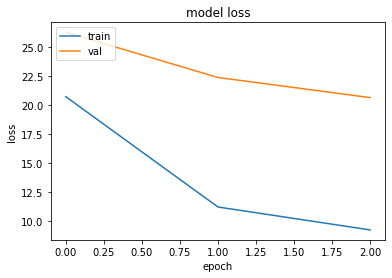

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()